# Week 4 Time Series

We will learn some basic handling of time series

## Timestamps

In [1]:
import pandas as pd
# Create a timestamp
pd.Timestamp(year=2024,
            month=10,
            day=21,
            hour=10,
            minute=1,
            second=30)

Timestamp('2024-10-21 10:01:30')

In [2]:
pd.Series([pd.Timestamp(2020,10,18),
          pd.Timestamp(2020,10,19),
          pd.Timestamp(2020,10,10),])

0   2020-10-18
1   2020-10-19
2   2020-10-10
dtype: datetime64[ns]

## Read in data and explore

In [5]:
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL)

precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

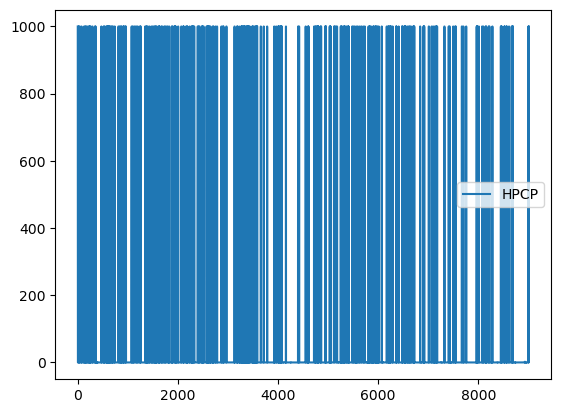

In [4]:
# Plot hourly precipitation in boulder, CO
precip.plot()

### What's wrong with this?
Outliers: There are many jumps close to 1000. This is clearly not right and these are outliers. Looking at the column descriptions we can see 999.99 indicates the hourly precipitation data is missing.

Indexing: The 
-axis values are given by the index of the dataframe and not relative to time.

Time range: We are only intersted in the precipitation data from 2013, this graph is trying to plot all our data.

## Reading in missing data values
Reload data frame indicating that 999.99 is NA

In [6]:
# Read in csv indicating NA values based on metadata
precip = pd.read_csv(URL, na_values=[999.99])

In [7]:
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

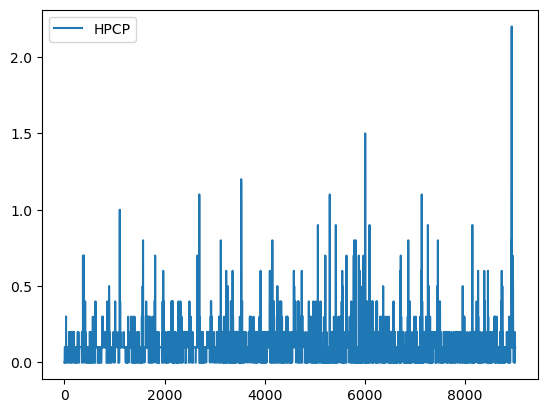

In [8]:
precip.plot()

## Convert strings into dates

Notice that the `date` column in df is not of type `datetime`:

In [9]:
# Check whether date column is type datetime
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

Remember that `object` data type means that (most likely) all values in that column are strings (words!)

We can convert string to date time objects

In [11]:
# Convert to datetime
precip['DATE'] = pd.to_datetime(precip['DATE'])

In [12]:
precip.dtypes

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object

<AxesSubplot:xlabel='DATE'>

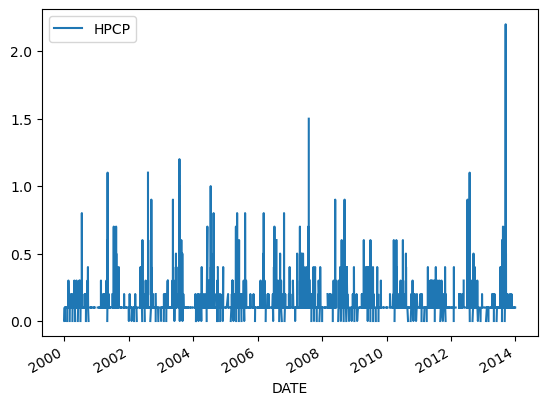

In [13]:
precip.plot(x='DATE', y='HPCP')

Next, set the date column as the index to perform operations with respect to time 

In [14]:
# Set date column to index
precip = precip.set_index('DATE')

# Inspect new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


## Leverage `pd.read_csv()` to set index


In [15]:
'''
Read in boulder, CO hourly precip data and 
HPCP = hourly precipitation 
'''
df = pd.read_csv(URL,
                na_values=[999.99],
                index_col=['DATE'],
                parse_dates=['DATE'])

## Subsetting by date

examples:
in general we can use `.loc[year-month]` to select data from specific year and month 

In [16]:
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


## Resampling 

a time series means converting a time series from one frequency to another. For example, monthly to yearly (downsampling) or weekly to daily (upsampling). We can resample with the resample() method. The simplest use is to call

`df.resample(new_frequency).aggregator_function()`

where: - new_frequency is a string representing the new frequence to resample the data, for example 'D' for day, w for week, M for month, Y for year, and - aggregator_function() is the function we will use to aggregate the data into the new frequency. For example, max(), min(), sum(), or average().

The resample() method works similarly to groupby() in the sense that you need to specify a way to aggregate the data to get any output.

In [18]:
# Resample 2013 hourly data to daily frequency: no output
precip.loc['2013'].resample('D')

In [20]:
# Total daily precip in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

Created a new pd series where the index is every single day in the year, not hour by hour data points

<AxesSubplot:xlabel='DATE'>

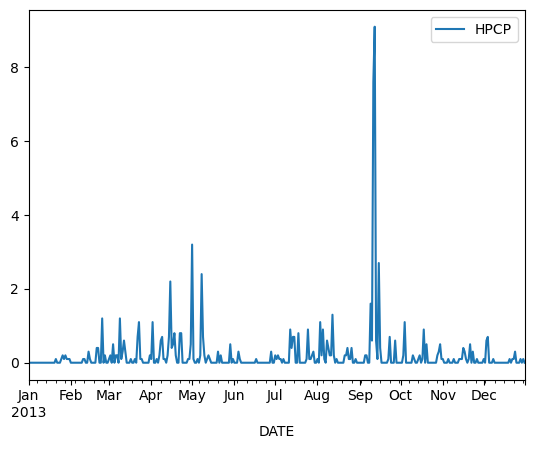

In [21]:
daily_precip_2013.plot()

Filled in missing values for day and it looks a lot smoother

## Complete workflow



<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, xlabel=' ', ylabel='daily precipitation (in)'>

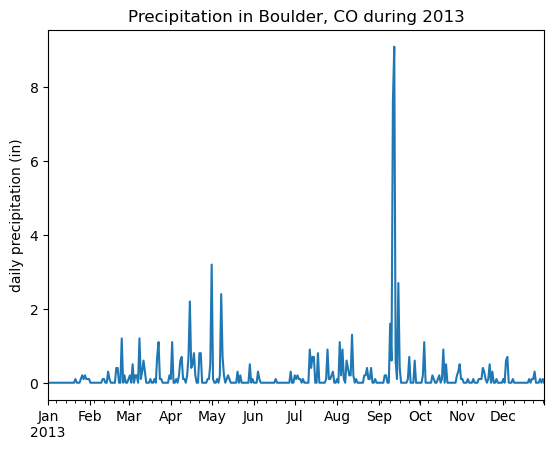

In [22]:
import pandas as pd

'''
Read in Boulder, CO hourly precipitation data 
HPCP = hourly precipitation (unique numerical column in data frame)
'''
URL = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(URL, 
                    na_values=[999.99],  # Known from metadata
                    index_col=['DATE'], 
                    parse_dates=['DATE']
                    )


# Calculate daily total precipitation during 2013
daily_precip_2013 = (precip.loc['2013']
                            .resample('D')
                            .sum()
                            .rename(columns={'HPCP':'daily_precipitation'})  
                            )

# Plot time series
daily_precip_2013.plot(ylabel='daily precipitation (in)', 
                       xlabel=' ',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)

# Vector data Geopandas

## Reproducible file paths

Let's import packages

In [1]:
import os # operating system
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
fp = os.path.join('data', 'gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')
fp

'data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp'

We can use this file path to import the shape file using the `geopandas.read_file()` function

In [4]:
pigs = gpd.read_file(fp)
pigs
# Ignore the warning for now...

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


## Check-in
Create a file path for CA state boundary and import as `ca_boundary`

In [5]:
ca_fp = fp = os.path.join('data', 'ca_state_boundary', 'ca_state_boundary.shp')


In [6]:
ca_boundary = gpd.read_file(ca_fp)
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


The `.shp` shape file is the whole bunch of files together, but you only read in one file. You still need the other extension files (`.cpg`, `.dbf`, `.prj`, etc) for it to work properly

## GeoSeries and GeoDataFrames

`gpd.GeoDataFrame` = `pandas.DataFrame` + geometry column

geometry column = `gpd.GeoSeries` it holds the geometry (point, polygon, etc.) of each spatial feature

The other columns in the GeoDataFrame are our usual `pandas.Serie`

Example

Notice the `geometry` column in the `pigs` geodataframe:

In [7]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [8]:
# Check what kind of object pigs is
print(type(pigs))

# Check object type of geometry column
print(type(pigs.geometry))

# Chcek object type of species column
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the values in each column

In [9]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [11]:
# Check the geometry type of each element in the geometry column
pigs.geom_type

0       Point
1       Point
2       Point
3       Point
4       Point
        ...  
1041    Point
1042    Point
1043    Point
1044    Point
1045    Point
Length: 1046, dtype: object

## Check-in

What is the geometry type of the single feature in the CA state boundary? Why does this make sense?

In [12]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

It's a multiple polygon because CA has a bunch of islands, don't want to see those as a separate thing

## CRS and extent

CRS = coordinate reference system and it is one of the basic pieces of information for geospatial data

We can think of the CRS as instructions to locate each spatial feature of our data frame on the surface of the Earth. 

In [13]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

EPSG: european petroleum survey group

In [15]:
# Get more info about our CRS
print('ellipsoid: ', pigs.crs.ellipsoid)
print('datum: ', pigs.crs.datum)
print('is geographic? ', pigs.crs.is_geographic)
print('is projected? ', pigs.crs.is_projected)

ellipsoid:  WGS 84
datum:  World Geodetic System 1984 ensemble
is geographic?  True
is projected?  False


- What are the ellipsoid and datum? What are they telling us about the CRS?
- What does it mean that the CRS is geographic and not projected?

Ellipsoid is the model we construct of the Earth and the datum is the information that is necessary to translate that imperfect ellipsoid to your location of interest. Ellipsoid is the abstract shape of the earth, then we need to align the datum with that shape.

The CRS being geographic is still looking at it in 3D space while projected is flattening it down to 2D space. 

### Extent
The **extent** is a geodataframe is the bounding box covering *all* the spatial features in our geo-dataframe. This is formed by finding the points that are furthest west, eath

In [16]:
# Obtain extent of gdf
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Check-in

Print the CRS and extent for CA boundary. Are both geo-dataframes in the same CRS?

In [18]:
print(ca_boundary.crs)
print(ca_boundary.total_bounds)

epsg:4326
[-124.48201686   32.52883674 -114.13122248   42.00950827]


In [19]:
pigs.crs == ca_boundary.crs

True

## Data wrangling

since `geopandas` is built on top of `pandas` we may use everything we have learned about data selection, wrangling, and modification for `pandas.DataFrames` to wrangle geo-dataframes

Example:

We only want to use recent data for wild pig observations.

In [22]:
# Examine pig observations by year
pigs.year.value_counts().sort_index()
# 31 pigs in 1818...

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [25]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check the length of the original df
print('Total number of observations: ',len(pigs))

# Check length of the new df
print('Number of observations since 2020: ',len(pigs_recent))

Total number of observations:  1046
Number of observations since 2020:  606


## Create a map

geo-dataframes also have a `plot` method that we can call directly to plot the data quickly

Example:

<AxesSubplot:>

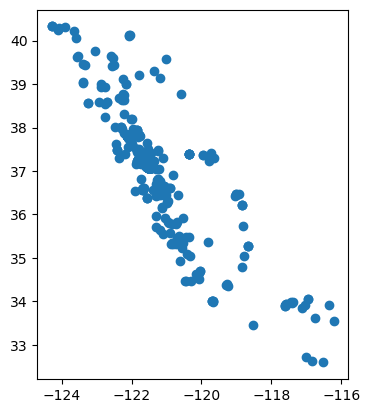

In [26]:
pigs_recent.plot()

## `matplotlib`'s `fig` and `ax`

Matplotlib graphs the data in a **figure** which can have one or more **axes**

The *axes* are only the area specified by a pair of x,y axes and what is plotted in it.

A figure may have multiple axes

To create a blank figure: 

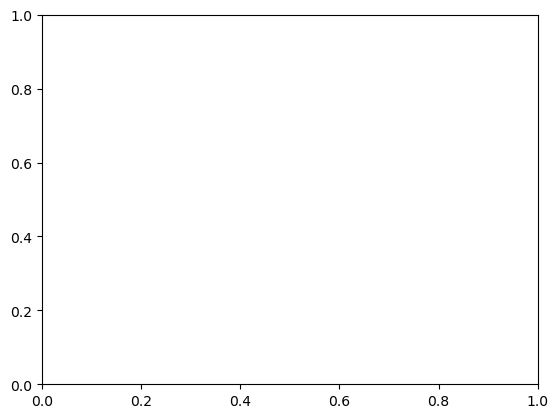

In [27]:
# Initialize an empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Display the figure
plt.show()

## Add layers

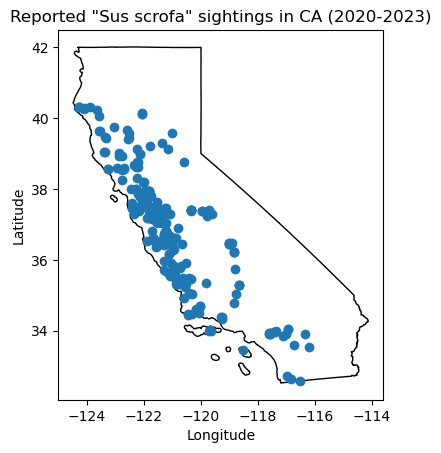

In [31]:
# Initialize an empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Add CA boundary
ca_boundary.plot(ax=ax,
                color = 'none',
                edgecolor = 'black')

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax) # tell the plot what axis it should be plotted on

# Customization
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the figure
plt.show()